In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
bank=pd.read_csv("Banknote.csv")
bank.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


Es importante saber cuántos clusters se van a ocupar en un modelo. En ocasiones no es fácil saberlo pero hay métodos que permiten saber cuántos clusters serían adecuados: Coeficiente de Silueta y el Método del Codo. 

### Coeficiente de Silueta

Se define a $a(x)$ como la distancia promedio de $x$ a todos los demás puntos del cluster y a $b(x)$ como la distancia promedio de $x$ a todos los demás puntos en el cluster más cercano.

$$s(x)=\frac{b(x)-a(x)}{\max[a(x),b(x)]}$$

en donde $s(x)$ puede variar entre $-1$ y $1$.
1. $-1$ si es mal agrupamiento
2. $0$ si es indiferente
3. $1$ si es un buen agrupamiento

El coeficiente de la siluta para todo el agrupamiento es: $$S=\frac{1}{N}\sum_{i=1}^{N}s(x)$$

In [19]:
V1=bank["V1"]
V2=bank["V2"]
data=np.column_stack((V1, V2))
print(data)

[[  3.6216    8.6661 ]
 [  4.5459    8.1674 ]
 [  3.866    -2.6383 ]
 ...
 [ -3.7503  -13.4586 ]
 [ -3.5637   -8.3827 ]
 [ -2.5419   -0.65804]]


In [24]:
kmedia=KMeans(n_clusters=5).fit(data)


In [25]:
kmedia.cluster_centers_ #estos son los centroides


array([[-3.18326453,  9.39405856],
       [ 3.14866199, -1.91375834],
       [ 2.72120945,  7.83283585],
       [-2.32610626, -8.03243231],
       [-0.58962695,  1.65799383]])

In [26]:
prediccion = kmedia.fit_predict(bank)


In [12]:
print(f'Coeficiente de Silueta(n=2): {silhouette_score(data, prediccion)}')


Coeficiente de Silueta(n=2): 0.43382839895806435


In [17]:
print(f'Coeficiente de Silueta(n=3): {silhouette_score(data, prediccion)}')


Coeficiente de Silueta(n=3): 0.433647663481252


In [23]:
print(f'Coeficiente de Silueta(n=4): {silhouette_score(data, prediccion)}')


Coeficiente de Silueta(n=4): 0.40377406947354777


In [30]:
print(f'Coeficiente de Silueta(n=5): {silhouette_score(data, prediccion)}')


Coeficiente de Silueta(n=5): 0.41826059029727214


Entonces se puede decir que con $n=2$ se ajustan mejor los clusters.

### Método del Codo

Consiste en crear una gráfica con el número de clusters en el eje $x$ y el total dentro de la suma de los cuadrados en el eje $y$ y luego identificar dónde aparece un “codo” o curva en el gráfico. El punto en el eje $x$ donde aparezca el codo será el número ideal de clusters a utilizar.

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


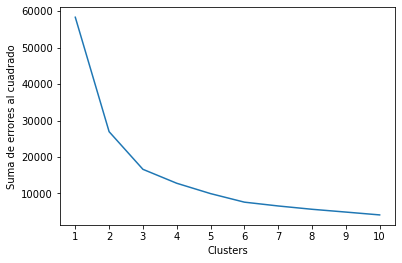

In [37]:
#inicio de los parámetros
kmeans_parametros = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#lista para la suma de errores al cuadrado
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_parametros)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

#graficando
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Clusters")
plt.ylabel("Suma de errores al cuadrado")
plt.show()

De igual forma que con el coeficiente de silueta, el número de clusters puede ser $2$ o $3$.